# Investigating Fandango Movie Ratings

In October 2015, a data journalist named Walt Hickey analyzed movie ratings data and found strong evidence to suggest that Fandango's rating system was biased and dishonest ([Fandango](https://www.fandango.com/) is an online movie ratings aggregator). He published his analysis in [this article](https://fivethirtyeight.com/features/fandango-movies-ratings/).

Fandango displays a 5-star rating system on their website, where the minimum rating is 0 stars and the maximum is 5 stars.

Hickey found that there's a significant discrepancy between the number of stars displayed to users and the actual rating, which he was able to find in the HTML of the page. He was able to find that:

- The actual rating was almost always rounded up to the nearest half-star. For instance, a 4.1 movie would be rounded off to 4.5 stars, not to 4 stars, as you may expect.
- In the case of 8% of the ratings analyzed, the rounding up was done to the nearest whole star. For instance, a 4.5 rating would be rounded off to 5 stars.
- For one movie rating, the rounding off was completely bizarre: from a rating of 4 in the HTML of the page to a displayed rating of 5 stars.

Fandango's officials replied that the biased rounding off was caused by a bug in their system rather than being intentional, and they promised to fix the bug as soon as possible. Presumably, this has already happened, although we can't tell for sure since the actual rating value doesn't seem to be displayed anymore in the pages' HTML.

In this project, we'll analyze more recent movie ratings data to determine whether there has been any change in Fandango's rating system after Hickey's analysis.

## Understanding the Data

We want to compare the Fandango's system's characteristics previous and after the analysis. Fortunately, we have ready-made data for both these periods of time:

- Walt Hickey made the data he analyzed publicly available [on GitHub](https://github.com/fivethirtyeight/data/tree/master/fandango). We'll use the data he collected to analyze the characteristics of Fandango's rating system previous to his analysis.  For simplicity, we'll store this data in the variable `hickey_movie_data`.

- One of Dataquest's team members collected movie ratings data for movies released in 2016 and 2017. The data is publicly available [on GitHub](https://github.com/mircealex/Movie_ratings_2016_17) and we'll use it to analyze the rating system's characteristics _after_ Hickey's analysis.  For simplicity, we'll store this data in the variable `recent_movie_data`.

In [1]:
import pandas as pd

hickey_movie_data = pd.read_csv("fandango_score_comparison.csv")
recent_movie_data = pd.read_csv("movie_ratings_16_17.csv")

In [2]:
hickey_movie_data.head(5)

FILM  RottenTomatoes  RottenTomatoes_User  \
0  Avengers: Age of Ultron (2015)              74                   86   
1               Cinderella (2015)              85                   80   
2                  Ant-Man (2015)              80                   90   
3          Do You Believe? (2015)              18                   84   
4   Hot Tub Time Machine 2 (2015)              14                   28   

   Metacritic  Metacritic_User  IMDB  Fandango_Stars  Fandango_Ratingvalue  \
0          66              7.1   7.8             5.0                   4.5   
1          67              7.5   7.1             5.0                   4.5   
2          64              8.1   7.8             5.0                   4.5   
3          22              4.7   5.4             5.0                   4.5   
4          29              3.4   5.1             3.5                   3.0   

   RT_norm  RT_user_norm  ...  IMDB_norm  RT_norm_round  RT_user_norm_round  \
0     3.70           4.3  ...       3.90            3.5                 4.5   
1     4.25           4.0  ...       3.55            4.5                 4.0   
2     4.00           4.5  ...       3.90            4.0                 4.5   
3     0.90           4.2  ...       2.70            1.0                 4.0   
4     0.70           1.4  ...       2.55            0.5                 1.5   

   Metacritic_norm_round  Metacritic_user_norm_round  IMDB_norm_round  \
0                    3.5                         3.5              4.0   
1                    3.5                         4.0              3.5   
2                    3.0                         4.0              4.0   
3                    1.0                         2.5              2.5   
4                    1.5                         1.5              2.5   

   Metacritic_user_vote_count  IMDB_user_vote_count  Fandango_votes  \
0                        1330                271107           14846   
1                         249                 65709           12640   
2                         627                103660           12055   
3                          31                  3136            1793   
4                          88                 19560            1021   

   Fandango_Difference  
0                  0.5  
1                  0.5  
2                  0.5  
3                  0.5  
4                  0.5  

[5 rows x 22 columns]

In [3]:
recent_movie_data.head(5)

movie  year  metascore  imdb  tmeter  audience  fandango  \
0      10 Cloverfield Lane  2016         76   7.2      90        79       3.5   
1                 13 Hours  2016         48   7.3      50        83       4.5   
2      A Cure for Wellness  2016         47   6.6      40        47       3.0   
3          A Dog's Purpose  2017         43   5.2      33        76       4.5   
4  A Hologram for the King  2016         58   6.1      70        57       3.0   

   n_metascore  n_imdb  n_tmeter  n_audience  nr_metascore  nr_imdb  \
0         3.80    3.60      4.50        3.95           4.0      3.5   
1         2.40    3.65      2.50        4.15           2.5      3.5   
2         2.35    3.30      2.00        2.35           2.5      3.5   
3         2.15    2.60      1.65        3.80           2.0      2.5   
4         2.90    3.05      3.50        2.85           3.0      3.0   

   nr_tmeter  nr_audience  
0        4.5          4.0  
1        2.5          4.0  
2        2.0          2.5  
3        1.5          4.0  
4        3.5          3.0

For the sake of our analysis, we're going to isolate the data we're specifically interested in; that is, data specific to a film (name and year) and it's Fandango data.  We'll make copies to avoid warnings later on.

In [9]:
hickey_fandango = hickey_movie_data[["FILM", "Fandango_Stars", "Fandango_Ratingvalue", "Fandango_votes", "Fandango_Difference"]].copy()
hickey_fandango.head(3)

FILM  Fandango_Stars  Fandango_Ratingvalue  \
0  Avengers: Age of Ultron (2015)             5.0                   4.5   
1               Cinderella (2015)             5.0                   4.5   
2                  Ant-Man (2015)             5.0                   4.5   

   Fandango_votes  Fandango_Difference  
0           14846                  0.5  
1           12640                  0.5  
2           12055                  0.5

In [10]:
recent_fandango = recent_movie_data[["movie", "year", "fandango"]].copy()
recent_fandango.head(3)

movie  year  fandango
0  10 Cloverfield Lane  2016       3.5
1             13 Hours  2016       4.5
2  A Cure for Wellness  2016       3.0

In [11]:
print(hickey_fandango.shape[0], recent_fandango.shape[0])

146 214


Our goal is to determine whether there has been any change in Fandango's rating system after Hickey's analysis.  The population of interest for our goal is the entire Fandango movie database.

As far as sampling, however, in neither of our two datasets is it random.

Taking a look at the [README.md file](https://github.com/fivethirtyeight/data/blob/master/fandango/README.md) for Hickey's data, we see that the following two criteria had to be met for inclusion:

- The movies had to be released (or at least have tickets available for theaters) in 2015.
- The movies had to be "popular," in this case defined by having at least 30 fan reviews on Fandango.

A similar story can be found in the [README.md file](https://github.com/mircealex/Movie_ratings_2016_17/blob/master/README.md) for the more recently pulled data.  For movies to be included in this dataset, they had to be:

- Released in 2016 or 2017.
- Be "popular, in this case defined by a "significant number of votes" (it is unclear what exact number was required)

As a result of these criteria for both datasets, not all movies had an equal chance at being included, and thus, the samples contained are unlikely to be representative of the entirety of the movie database.  This is due to a couple of resulting problems:

- Requiring a movie to have a certain number of reviews/votes eliminates what is likely a substantial number of movies from consideration.
- Specifiying a year of release for inclusion (and the fact that our two datasets focus on different years) introduces the potential impact of temporal trends; in this case, one year may have simply been better for movies than another.

While each of these samples, individually, served their purposes for their respective collectors/authors; the problems specified above make it so they aren't very useful for us.

## Changing the Goal of Our Analysis

At this point, we have at least two alternatives: either we collect new data, either we change the goal of our analysis by placing some limitations on it.

Tweaking our goal seems a much faster choice compared to collecting new data; particularly since it's quasi-impossible to collect a new sample previous to Hickey's analysis at this moment in time.  Our new goal, which is still a fairly good proxy for our initial goal, will be to determine whether there has been any change in Fandango's rating system after Hickey's analysis.

## Isolating the Samples We Need

With our new goal, we now have two populations that we want to describe and compare with each other:

- All Fandango's ratings for popular movies released in 2015.
- All Fandango's ratings for popular movies released in 2016.

The term "popular" is vague and we need to define it with precision before continuing.  We'll use Hickey's benchmark of 30 fan ratings and consider a movie as "popular" only if it has 30 fan ratings or more on Fandango's website.

One problem we run into is that our `recent_fandango` dataset doesn't provide information about the number of fan ratings, and this raises representativity issues once again.  In order to assess whether it likely meets our expectation of 30+ ratings, we'll take a random sample of 10 films, check their pages on Fandango, and record how many fan ratings each has manually.  Ideally, a vast majority (8+ out of 10) will have 30 ratings or more.

In [12]:
recent_fandango.sample(10, random_state = 1)

movie  year  fandango
108                   Mechanic: Resurrection  2016       4.0
206                                 Warcraft  2016       4.0
106                                Max Steel  2016       3.5
107                            Me Before You  2016       4.5
51   Fantastic Beasts and Where to Find Them  2016       4.5
33                                      Cell  2016       3.0
59                                    Genius  2016       3.5
152                                    Sully  2016       4.5
4                    A Hologram for the King  2016       3.0
31                Captain America: Civil War  2016       4.5

As of late 2019, Fandango no longer uses its own ratings system - it embeds Rotten Tomatoes' ratings data.  That said, we'll use saved data from April 2018, which shows this data for our sample:

Movie | # Ratings
--|--
Mechanic: Resurrection | 2247
Warcraft | 7271
Max Steel | 493
Me Before You | 5263
Fantastic Beasts and Where to Find Them | 13400
Cell | 17
Genius | 127
Sully | 11877
A Hologram for the King | 500
Captain America: Civil War | 35057

90% of the movies in our sample qualify as "popular," given our criteria.  This is substantial enough, and we can move forward with confidence.

Let's also double-check our other set of data (Hickey's sample) to ensure that it meets our 30+ ratings requirement, as well:

In [13]:
hickey_fandango[hickey_fandango["Fandango_votes"] >= 30].shape[0]

146

We can see that 146 out of 146 entries in Hickey's dataset contain at least 30 ratings.

Next, we need to address the fact our data sets contain movies with a release year other than 2015 or 2016.  We need to isolate only the sample points that belong to our populations of interest.

We'll start by looking at Hickey's data set and isolating only the films actually released in 2015.  Currently, there's no `Year` column in that dataset, so we'll create one by pulling it from the `FILM` column.

In [22]:
hickey_fandango["Year"] = hickey_fandango["FILM"].str[-5:-1]
hickey_fandango.head(3)

FILM  Fandango_Stars  Fandango_Ratingvalue  \
0  Avengers: Age of Ultron (2015)             5.0                   4.5   
1               Cinderella (2015)             5.0                   4.5   
2                  Ant-Man (2015)             5.0                   4.5   

   Fandango_votes  Fandango_Difference  Year  
0           14846                  0.5  2015  
1           12640                  0.5  2015  
2           12055                  0.5  2015

In [32]:
hickey_fandango["Year"].value_counts()

2015    129
2014     17
Name: Year, dtype: int64

We can see that both 2014 and 2015 are represented, so we'll create a new dataframe that isolates 2015 release movies:

In [36]:
fandango_2015 = hickey_fandango[hickey_fandango["Year"] == "2015"].copy()
fandango_2015["Year"].value_counts()

2015    129
Name: Year, dtype: int64

We'll also take a look at the `year` values from our more recent dataset, where we can see both 2016 and 2017 are present.  We'll create a new dataframe here to isolate 2016 release movies.

In [35]:
recent_fandango["year"].value_counts()

2016    191
2017     23
Name: year, dtype: int64

In [38]:
fandango_2016 = recent_fandango[recent_fandango["year"] == 2016].copy()
fandango_2016["year"].value_counts()

2016    191
Name: year, dtype: int64

## Comparing Distribution Shapes for 2015 and 2016

We can now start analyzing the two samples we isolated.  Once again, our goal is to determine whether there's any difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016.

We'll start simple by making a high-level comparison between the shapes of the distributions of movie ratings for both samples.

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline

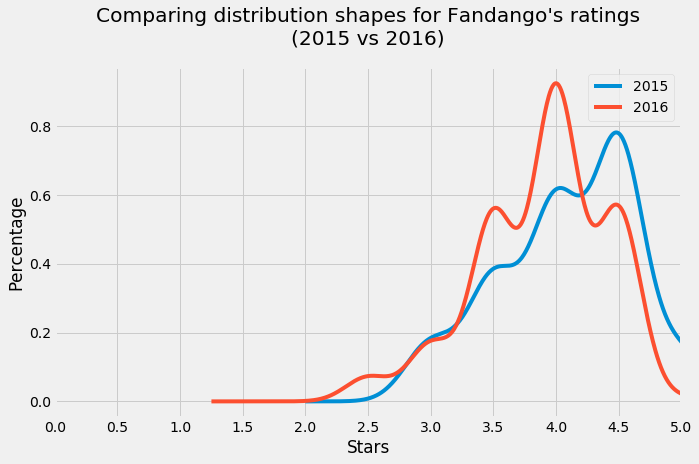

In [55]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(10, 6))
fandango_2015["Fandango_Stars"].plot.kde()
fandango_2016["fandango"].plot.kde()
plt.legend(["2015", "2016"])
plt.xlabel("Stars")
plt.ylabel("Percentage")
plt.xlim(0, 5)
plt.xticks([0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])
plt.title("Comparing distribution shapes for Fandango's ratings\n(2015 vs 2016)", y = 1.05)
plt.show()

Looking at our visualization above, two things stand out:

- Both distributions are heavily left-skewed
- The 2016 distribution is shifted slightly to the left of the 2015 distribution

In particular, the slight left shift of the 2016 curve is interesting. It tells us that there was, indeed, a difference in ratings between 2015 and 2016.  We are also able to see the direction of the difference: the ratings in 2016 were slightly lower than those in 2015.

## Comparing Relative Frequencies

While comparing the distributions above was a great start, we now need to analyze more granular information; specifically, the percentages related to each rating per distribution.  Percentages make more sense than displaying absolute frequencies-per-rating given that our two samples have different sample sizes.

In [62]:
fandango_2015["Fandango_Stars"].value_counts(normalize = True).sort_index() * 100

3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [63]:
fandango_2016["fandango"].value_counts(normalize = True).sort_index() * 100

2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

Looking at these two frequency tables, it's still quite clear that ratings for popular movies were, overall, lower in 2016 than in 2015.

- Though the bulk of ratings for both samples are contained between scores of 3.5 and 4.5, we can see that, in 2016, there were actually some 2.5 ratings (of which there were none in 2015).
- We also see that the most frequent rating (nearly 38% of ratings) was 4.5 in 2015, while the most frequent in 2016 (40%) was 4.0.
- In addition, almost 7% of ratings were perfect 5.0 in 2015, while only 0.5% hit that mark in 2016.

The direction of the difference between the two distributions isn't as clear here as it was in our kernel density plots above.

## Determining the Direction of the Change

We'll take a couple of summary statistics to get a more precise picture about the direction of the difference. We'll take each distribution of movie ratings and compute its mean, median, and mode, and then compare these statistics to determine what they tell about the direction of the difference.

In [71]:
mean_2015 = fandango_2015["Fandango_Stars"].mean()
mean_2016 = fandango_2016["fandango"].mean()

median_2015 = fandango_2015["Fandango_Stars"].median()
median_2016 = fandango_2016["fandango"].median()

mode_2015 = fandango_2015["Fandango_Stars"].mode()[0] # the output of Series.mode() is a series, so we isolate the actual value
mode_2016 = fandango_2016["fandango"].mode()[0]

fandango_summary = pd.DataFrame()
fandango_summary['2015'] = [mean_2015, median_2015, mode_2015]
fandango_summary['2016'] = [mean_2016, median_2016, mode_2016]
fandango_summary.index = ['mean', 'median', 'mode']
fandango_summary

2015      2016
mean    4.085271  3.887435
median  4.000000  4.000000
mode    4.500000  4.000000

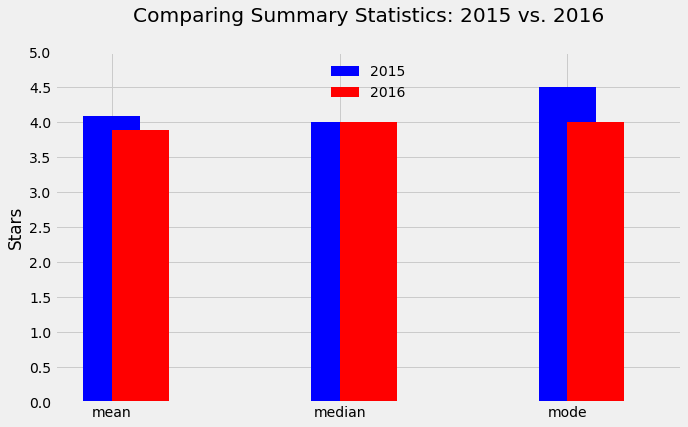

In [88]:
import numpy as np
plt.style.use("fivethirtyeight")
plt.figure(figsize = (10, 6))
fandango_summary['2015'].plot.bar(align = 'center', legend = True, color = 'blue', width = 0.25)
fandango_summary['2016'].plot.bar(align = 'edge', legend = True, color = 'red', width = 0.25, rot = 0)

plt.title("Comparing Summary Statistics: 2015 vs. 2016", y = 1.07)
plt.ylim(0, 5)
plt.yticks(np.arange(0, 5.1, 0.5))
plt.ylabel("Stars")
plt.legend(loc = "upper center", framealpha = 0)
plt.show()

The mean rating was lower in 2016 by approximately 0.2 stars.  This means a drop of almost 5% relative to the mean rating in 2015.

In [89]:
(fandango_summary.loc['mean'][0] - fandango_summary.loc['mean'][1]) / fandango_summary.loc['mean'][0]

0.04842683568951993

We can say that calculating the median value doesn't tell us much about the direction of the difference.

Looking at the mode values, we see that 4.5 was the most common value in 2015, while 4.0 was the most common in 2016.  This isn't super indicative of an overall trend, but it does also hint at a shift toward lower scores in 2016 compared to 2015.

## Conclusion

Our analysis showed that there's indeed a slight difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. We also determined that, on average, popular movies released in 2016 were rated lower on Fandango than popular movies released in 2015.

While it isn't clear what caused the change, there's a distinct possibility that it was caused, or at least heavily impacted, by Fandango changing the biased rating system after the publishing of Hickey's analysis.